# Feature Selection 

**Author :** Tulay Caglayan

### Objective:

Try feature selection techniques on data and compare result. We will use DecisionTree algoritm as base algorithm 

**What is Feature Selection?:** 

**Why do we ned Feature Selection?:** 


### Resources Available: 
The data file "mushrooms.csv" is exported from  https://www.kaggle.com/uciml/mushroom-classification.

### Attribute Information:

**Dependent Feature(Target/Label)** 
1. classes: edible=e, poisonous=p

**Independent Features**
2. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
3. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
4. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
5. bruises: bruises=t,no=f
6. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
7. gill-attachment: attached=a,descending=d,free=f,notched=n
8. gill-spacing: close=c,crowded=w,distant=d
9. gill-size: broad=b,narrow=n
10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
11. stalk-shape: enlarging=e,tapering=t
12. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
15. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
17. veil-type: partial=p,universal=u
18. veil-color: brown=n,orange=o,white=w,yellow=y
19. ring-number: none=n,one=o,two=t
20. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
21. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
22. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
23. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import LabelEncoder

# Train test split
from sklearn.model_selection import train_test_split

# Feature Selection 
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE #recursive selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Models
from sklearn.ensemble import RandomForestClassifier
### below will be used for selecting feature importance 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# Metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# visualization\
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time

import warnings
warnings.filterwarnings("ignore")

# Load Data 

In [2]:
df = pd.read_csv("data/mushrooms.csv")
df.shape

(8124, 23)

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

Since all features are object type, we should transfer all to numeric. We will use one hot encoding to transfer independent features and labelEncoder to transfer dependent feature named 'class'

In [4]:
# count all distinct values 
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [5]:
for c in df.columns:
    print ( pd.DataFrame(df[c].value_counts()))

   class
e   4208
p   3916
   cap-shape
x       3656
f       3152
k        828
b        452
s         32
c          4
   cap-surface
y         3244
s         2556
f         2320
g            4
   cap-color
n       2284
g       1840
e       1500
y       1072
w       1040
b        168
p        144
c         44
u         16
r         16
   bruises
f     4748
t     3376
   odor
n  3528
f  2160
s   576
y   576
a   400
l   400
p   256
c   192
m    36
   gill-attachment
f             7914
a              210
   gill-spacing
c          6812
w          1312
   gill-size
b       5612
n       2512
   gill-color
b        1728
p        1492
w        1202
n        1048
g         752
h         732
u         492
k         408
e          96
y          86
o          64
r          24
   stalk-shape
t         4608
e         3516
   stalk-root
b        3776
?        2480
e        1120
c         556
r         192
   stalk-surface-above-ring
s                      5176
k                      2372
f           

There is no empty fields that we need to treat

In [6]:
X = df.drop(columns=['class'], axis=1)
y = df['class']

X = pd.get_dummies(X, prefix_sep="_", drop_first=True)
y = LabelEncoder().fit_transform(y)

In [7]:
print("There are %s features "% X.shape[1])

There are 95 features 


# Create and Execute Model 

In [8]:
# draw confusion matrix function
def draw_confusion_matrix(y_test, y_pred):

    # Draw confusion matrix
    plt.figure(figsize=[4, 4])
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages =['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in ["Actual 0","Actual 1"]], 
                                 columns = [i for i in ["Predict 0","Predict 1"]])
    sns.heatmap(df_cm, fmt='', linewidths=1, annot=labels, cbar=False, annot_kws={"size":14})
    plt.title('Confusion Matrix' )
    plt.show()
        
    # print classification_report 
    print(classification_report(y_test, y_pred))
   
  
model_metrics = {} 
# save_metrucs function will be used to store each metric for models in order to compare results
def save_metrics(y_test, y_pred, y_proba, execution_time, model_name):

    # save metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_roc_auc = roc_auc_score(y_test, y_proba[:,1] )
    
    model_metrics[model_name] = {'Feature Count': X_test.shape[1],
                               'Accuracy': '{:.2f}'.format( np.round(accuracy,2)),
                               'Precision': '{:.2f}'.format(np.round(precision,2)),
                               'Recall': '{:.2f}'.format(np.round(recall,2)),
                               'F1-Score': '{:.2f}'.format(np.round(f1,2)), 
                               'AUC': '{:.2f}'.format(np.round(model_roc_auc,2)),
                               'Time' : '{:.8f}'.format(execution_time)
                               }
    

### 1. With All Features

In [9]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

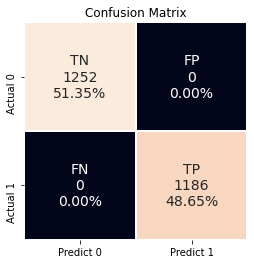

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00      1186

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [10]:
# create model object
model = RandomForestClassifier(n_estimators=500)

# fit model and measure execution time 
start = time.process_time()
model.fit(X_train, y_train)
execution_time = time.process_time() - start

# Prediction on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# report model
draw_confusion_matrix(y_test, y_pred)
save_metrics(y_test, y_pred, y_proba, execution_time, 'With All Features')

* As we see without any feature drop, we have 100% accuracy

### 2. Feature Selection by Using Feature Importance

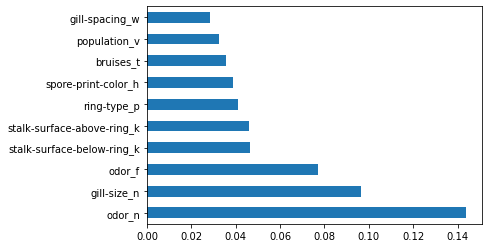

In [11]:
feature_importance = pd.Series(model.feature_importances_, index= X.columns)
feature_importance.nlargest(10).plot(kind='barh');

In [12]:
# get most important 4 features 
X_feature_importance = X[feature_importance.nlargest(4).index]

# train test split by using X_feature_importance
X_train, X_test, y_train, y_test = train_test_split(X_feature_importance, y, test_size=0.3, random_state=7)

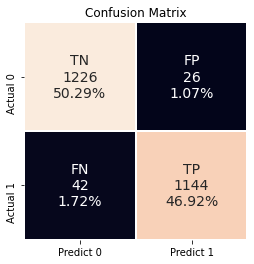

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1252
           1       0.98      0.96      0.97      1186

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



In [13]:
# create model object
model = RandomForestClassifier(n_estimators=500)

# fit model and measure execution time
start = time.process_time()
model.fit(X_train, y_train)
execution_time = time.process_time() - start

# Prediction on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# report model
draw_confusion_matrix(y_test, y_pred)
save_metrics(y_test, y_pred, y_proba, execution_time, 'Feature Importance')

* By getting 4 features out of 95 features, we have 99% accuracy. We don't lose much accuracy, but with 4 features we save time, especially with big data

### 3. Feature Selection by Using Tree-based feature selection

Tree-based estimators can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features (when coupled with the SelectFromModel meta-transformer)


In [14]:
clf = ExtraTreesClassifier(n_estimators=300).fit(X, y)

selectFromModel = SelectFromModel(clf, prefit=True)
X_selectFromModel = selectFromModel.transform(X)
X_selectFromModel.shape

(8124, 23)

In [15]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_selectFromModel, y, test_size=0.3, random_state=7)

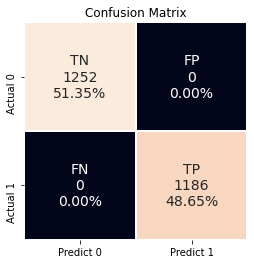

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00      1186

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [16]:
# create model object
model = RandomForestClassifier(n_estimators=500)

# fit model and measure execution time 
start = time.process_time()
model.fit(X_train, y_train)
execution_time = time.process_time() - start

# Prediction on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# report model
draw_confusion_matrix(y_test, y_pred)
save_metrics(y_test, y_pred, y_proba, execution_time, 'Tree-based feature selection')

* We can get 100% accuracy by 22 features 

### 4. Feature Selection by Using L1-based feature selection

Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with **SelectFromModel** to select the non-zero coefficients.   

In particular, **sparse estimators** useful for this purpose are :
* **Lasso** for regression
* **LogisticRegression** and **LinearSVC** for classification:

With SVMs and logistic-regression, the parameter C controls the sparsity: the smaller C the fewer features selected. With Lasso, the higher the alpha parameter, the fewer features selected.   


In [17]:
lsvc = LinearSVC(C=0.0003, penalty="l1", dual=False).fit(X, y) 

selectFromModel = SelectFromModel(lsvc, prefit=True)
X_selectFromModel = selectFromModel.transform(X)
X_selectFromModel.shape

(8124, 5)

In [18]:
# train test split by using X_feature_importance
X_train, X_test, y_train, y_test = train_test_split(X_selectFromModel, y, test_size=0.3, random_state=7)

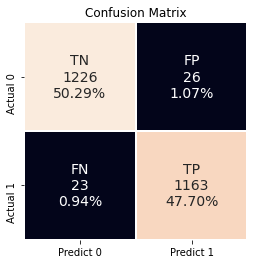

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1252
           1       0.98      0.98      0.98      1186

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [19]:
# create model object
model = RandomForestClassifier(n_estimators=500)

# fit model and measure execution time 
start = time.process_time()
model.fit(X_train, y_train)
execution_time = time.process_time() - start

# Prediction on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# report model
draw_confusion_matrix(y_test, y_pred)
save_metrics(y_test, y_pred, y_proba, execution_time, 'L1-based feature selection')

* With selectFromModel and LinearSVC, we selected 5 features. Our accuracy is 98% 

### 5. Feature Selection by Using Sklearn VarianceThreshold

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.  

Boolean features are Bernoulli random variables, and the variance of such variables is given by   

Var[X] = p(1-p)  

VarianceThreshold removes the features which have zeros more than threshold

In [20]:
# remove all features that are either one or zero (on or off) in more than 80% of the data. 
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_selected = sel.fit_transform(X)
X_selected.shape

(8124, 28)

In [21]:
# train test split by using X_feature_importance
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=7)

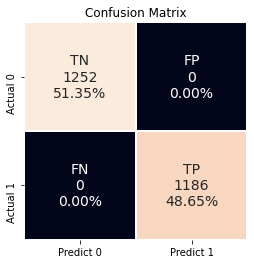

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00      1186

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [22]:
# create model object
model = RandomForestClassifier(n_estimators=500)

# fit model and measure execution time 
start = time.process_time()
model.fit(X_train, y_train)
execution_time = time.process_time() - start

# Prediction on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# report model
draw_confusion_matrix(y_test, y_pred)
save_metrics(y_test, y_pred, y_proba, execution_time, 'VarianceThreshold')

### 6. Feature Selection by Using Sklearn SelectKBest

SelectKBest removes all but the  highest scoring features 


In [23]:
X_kBest = SelectKBest(chi2, k=5).fit_transform(X, y)
X_kBest.shape

(8124, 5)

In [24]:
# train test split by using X_feature_importance
X_train, X_test, y_train, y_test = train_test_split(X_kBest, y, test_size=0.3, random_state=7)

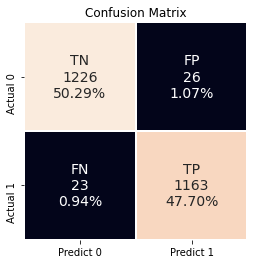

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1252
           1       0.98      0.98      0.98      1186

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [25]:
# create model object
model = RandomForestClassifier(n_estimators=500)

# fit model and measure execution time 
start = time.process_time()
model.fit(X_train, y_train)
execution_time = time.process_time() - start

# Prediction on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# report model
draw_confusion_matrix(y_test, y_pred)
save_metrics(y_test, y_pred, y_proba, execution_time, 'SelectKBest')

### 7. Feature Selection by Recursive Feature Elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.    

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable.   

Then, the least important features are pruned from current set of features.   

That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.


In [26]:
# Create the RFE object
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False)

X_rfe = RFE(estimator=lsvc, n_features_to_select=5).fit_transform(X, y)
X_rfe.shape

(8124, 5)

In [27]:
# train test split by using X_feature_importance
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=7)

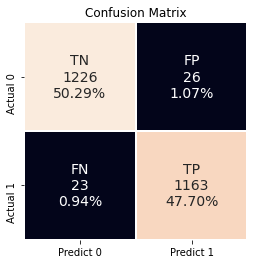

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1252
           1       0.98      0.98      0.98      1186

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [28]:
# create model object
model = RandomForestClassifier(n_estimators=500)

# fit model and measure execution time 
start = time.process_time()
model.fit(X_train, y_train)
execution_time = time.process_time() - start

# Prediction on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# report model
draw_confusion_matrix(y_test, y_pred)
save_metrics(y_test, y_pred, y_proba, execution_time, 'Recursive Feature Elimination')

### 8. Feature Selection by SequentialFeatureSelector

Sequential Feature Selection [sfs] (SFS) is available in the SequentialFeatureSelector transformer. SFS can be either forward or backward:   

**Forward-SFS** is a greedy procedure that iteratively finds the best new feature to add to the set of selected features. Concretely, we initially start with zero feature and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the **n_features_to_select** parameter.    

**Backward-SFS** follows the same idea but works in the opposite direction: instead of starting with no feature and greedily adding features, we start with all the features and greedily remove features from the set. The direction parameter controls whether forward or backward SFS is used.    

In general, forward and backward selection do not yield equivalent results. Also, one may be much faster than the other depending on the requested number of selected features: if we have 10 features and ask for 7 selected features, forward selection would need to perform 7 iterations while backward selection would only need to perform 3.    

**SFS** differs from **RFE** and **SelectFromModel** in that it does not require the underlying model to expose a coef_ or feature_importances_ attribute. It may however be slower considering that more models need to be evaluated, compared to the other approaches. For example in backward selection, the iteration going from m features to m - 1 features using k-fold cross-validation requires fitting m * k models, while RFE would require only a single fit, and SelectFromModel always just does a single fit and requires no iterations.   


In [29]:
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False)

sfs1 = SFS(lsvc, 
           k_features=20, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y)

In [35]:
X_sfs = X[ list(sfs1.k_feature_names_) ]

# train test split by using X_feature_importance
X_train, X_test, y_train, y_test = train_test_split(X_sfs, y, test_size=0.3, random_state=7)

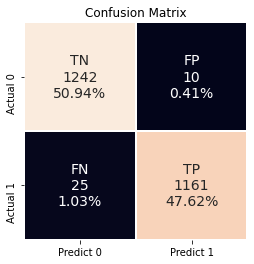

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1252
           1       0.99      0.98      0.99      1186

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [36]:
# create model object
model = RandomForestClassifier(n_estimators=500)

# fit model and measure execution time 
start = time.process_time()
model.fit(X_train, y_train)
execution_time = time.process_time() - start

# Prediction on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# report model
draw_confusion_matrix(y_test, y_pred)
save_metrics(y_test, y_pred, y_proba, execution_time, 'SequentialFeatureSelector')

### 10. Feature selection as part of a pipeline

Feature selection is used as a pre-processing step before doing the actual learning. The recommended way to do this in scikit-learn is to use a Pipeline.

In this snippet, we make use of a LinearSVC coupled with SelectFromModel to evaluate feature importances and select the most relevant features. Then, a DecisionTreeClassifier is trained on the transformed output, i.e. using only relevant features

In [32]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

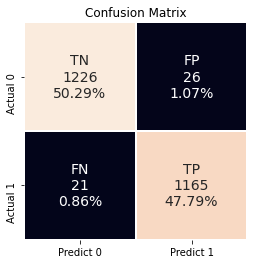

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1252
           1       0.98      0.98      0.98      1186

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [33]:
# create model object
model = Pipeline([
          ('feature_selection', SelectFromModel(LinearSVC(C=0.001, penalty="l1", dual=False))),
          ('classification', RandomForestClassifier(n_estimators=500))
        ])

# fit model and measure execution time 
start = time.process_time()
model.fit(X_train, y_train)
execution_time = time.process_time() - start

# Prediction on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# report model
draw_confusion_matrix(y_test, y_pred)

# Conclusion

In this work, we compared time gains and accuracy loose by dropping insignificant features. Results we concluded are:   
* By dropping unnecessary features, our model time performance and complexity will be better. In our example, data is too small. For big data, time will really matter
* We don't loose too much accuracy by dropping uncessary features or features having low importance. Accuracy goes down from 100% to 98%, 99% . This worths to drop to have simpler model and good time gain 


In [37]:
# Scores of all the models by building a dataframe with model names as row index and all the metrics calculated as columns
pd.DataFrame.from_dict(model_metrics, orient='index')

,Feature Count,Accuracy,Precision,Recall,F1-Score,AUC,Time
With All Features,95,1.00,1.00,1.00,1.00,1.00,1.84081180
Feature Importance,4,0.97,0.98,0.96,0.97,0.99,1.21680780
Tree-based feature selection,23,1.00,1.00,1.00,1.00,1.00,1.37280880
L1-based feature selection,5,0.98,0.98,0.98,0.98,1.00,1.23240790
VarianceThreshold,28,1.00,1.00,1.00,1.00,1.00,1.59121020
SelectKBest,5,0.98,0.98,0.98,0.98,0.99,1.26360810
Recursive Feature Elimination,5,0.98,0.98,0.98,0.98,0.99,1.34160860
SequentialFeatureSelector,20,0.99,0.99,0.98,0.99,1.00,1.60681030
